In [37]:
import pandas as pd
import numpy as np
import seaborn as sns

# Baseline MLP Material Classification Experiment

In [38]:
# read data
PATH = "../../my_data/identification-dataset/my_custom_data/big-identification-dataset.csv"
df = pd.read_csv(PATH)

In [39]:
# drop uncomplete rows
df.dropna(inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119744 entries, 0 to 159586
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   tdoa           119744 non-null  float64
 1   snr_an         119744 non-null  float64
 2   power_dif      119744 non-null  float64
 3   rx_snr         119744 non-null  float64
 4   rx_powerdif    119744 non-null  float64
 5   tof            119744 non-null  float64
 6   material       119744 non-null  object 
 7   NLOS_material  119744 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 8.2+ MB


In [41]:
# Dropping rows containing 0 in the 'NLOS_material' column
df = df[df['NLOS_material'] != 0]

In [42]:
# show different label types
df.NLOS_material.unique()

array([1, 2, 3, 4, 5, 6])

In [43]:
# show the respective materials
df.material.unique()

array(['cardboard', 'foam', 'metal', 'plastic', 'wooden-cabinet',
       'wooden-shelf'], dtype=object)

## Classification

In [44]:
# Import modules from Scikit-learn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split   # Import train_test_split function
from sklearn import metrics   # import metrics modules for accuracy calculation
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Create a pipeline object for the model
pipe_MLP = make_pipeline(StandardScaler(),
                         MLPClassifier(solver='adam',
                                       hidden_layer_sizes=(100,100,100,100),
                                       random_state=0,
                                       max_iter=500,           # TODO: tune it later
                                       verbose=True
                                       )
                        )

In [46]:
train_df = df[['tdoa', 'snr_an', 'power_dif', 'rx_snr', 'rx_powerdif', 'tof', 'NLOS_material']]

<Axes: xlabel='NLOS_material', ylabel='count'>

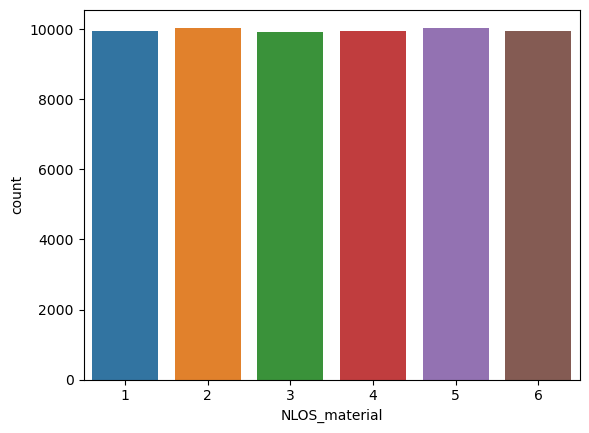

In [47]:
# plot class imbalance
sns.countplot(x=df['NLOS_material'])

In [48]:
# Extracted features 
X = train_df[['tdoa', 'snr_an', 'power_dif', 'rx_snr', 'rx_powerdif', 'tof']]
y = train_df['NLOS_material'] # Labels

In [49]:
# Split dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 70% training and 30% test

In [50]:
# Train the whole pipeline
pipe_MLP.fit(X_train, y_train)

Iteration 1, loss = 0.87563862
Iteration 2, loss = 0.66752087
Iteration 3, loss = 0.62656109
Iteration 4, loss = 0.60924939
Iteration 5, loss = 0.59940492
Iteration 6, loss = 0.58880942
Iteration 7, loss = 0.58036355
Iteration 8, loss = 0.57731408
Iteration 9, loss = 0.57538647
Iteration 10, loss = 0.57091303
Iteration 11, loss = 0.56765006
Iteration 12, loss = 0.56279861
Iteration 13, loss = 0.55996239
Iteration 14, loss = 0.55759568
Iteration 15, loss = 0.55763399
Iteration 16, loss = 0.55506909
Iteration 17, loss = 0.55468045
Iteration 18, loss = 0.55303277
Iteration 19, loss = 0.55107089
Iteration 20, loss = 0.54773471
Iteration 21, loss = 0.54950009
Iteration 22, loss = 0.54643759
Iteration 23, loss = 0.54538078
Iteration 24, loss = 0.54392947
Iteration 25, loss = 0.54110147
Iteration 26, loss = 0.54079200
Iteration 27, loss = 0.53883754
Iteration 28, loss = 0.54018461
Iteration 29, loss = 0.53721702
Iteration 30, loss = 0.53787587
Iteration 31, loss = 0.53385604
Iteration 32, los

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100),
                               max_iter=500, random_state=0, verbose=True))])

In [51]:
# Make predictions on the test data
y_pred = pipe_MLP.predict(X_test)

In [52]:
# Caluclate the accuracy on test data predicitons
print(f'Test Accuracy: {metrics.accuracy_score(y_test, y_pred) * 100}%')

Test Accuracy: 73.14330252755818%


In [53]:
print(f'Test Precision: {metrics.precision_score(y_test, y_pred, average="macro") * 100}%')

Test Precision: 73.04555975360775%


In [54]:
print(f'Test Recall: {metrics.recall_score(y_test, y_pred, average="macro") * 100}%')

Test Recall: 73.1378535499772%


In [55]:
print(f'Test F1: {metrics.f1_score(y_test, y_pred, average="macro" )}')

Test F1: 0.7299504648938905


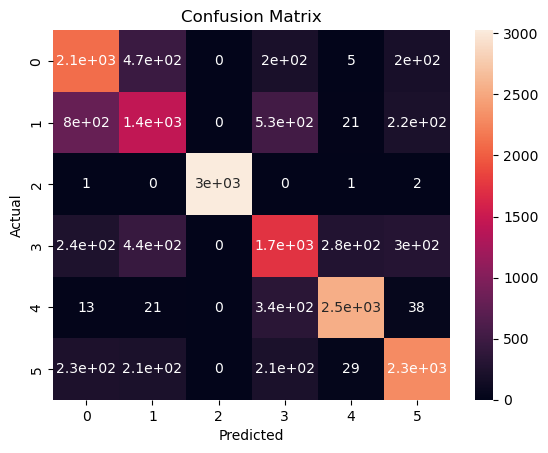

In [56]:
cm = confusion_matrix(y_test, y_pred)
# axis_labels = ['1', 'False']
plt.figure()
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [57]:
cm

array([[2104,  472,    0,  205,    5,  195],
       [ 795, 1433,    0,  530,   21,  220],
       [   1,    0, 3026,    0,    1,    2],
       [ 244,  445,    0, 1734,  283,  305],
       [  13,   21,    0,  341, 2545,   38],
       [ 231,  214,    0,  213,   29, 2296]])

In [58]:
# sum row
np.sum(cm, axis=1)

array([2981, 2999, 3030, 3011, 2958, 2983])